In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np  

In [181]:
df=pd.read_csv('data eda hackathon 2 credit.csv')

## level 0

In [182]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [184]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [186]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

## level 1 analysis

In [188]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 20:      
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)       


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 
    if df[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")
    

## univariate analysis of categorical variable

In [9]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

## target

In [10]:
info_of_cat('TARGET')

Unique values in TARGET are: [1 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


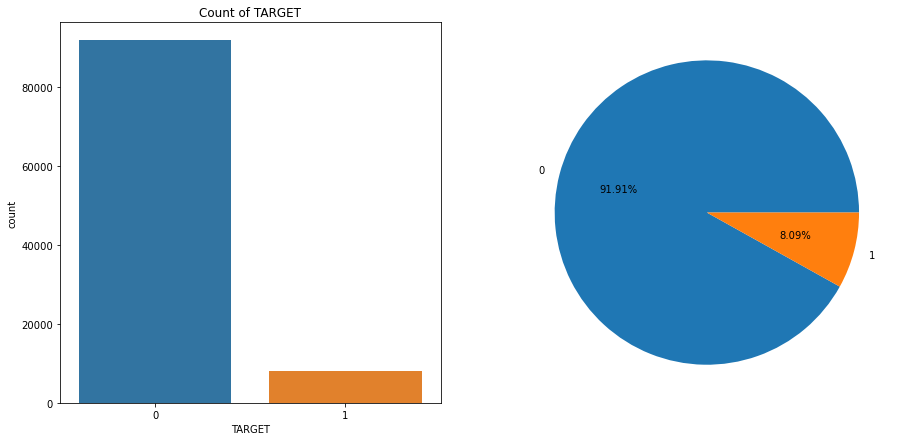

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of TARGET")               
percentage = df["TARGET"].value_counts()         
labels = list(df["TARGET"].value_counts().index) 

sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### about 8 percent of people have problem repaying their loans 

## NAME_CONTRACT_TYPE

In [12]:
info_of_cat('NAME_CONTRACT_TYPE')

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


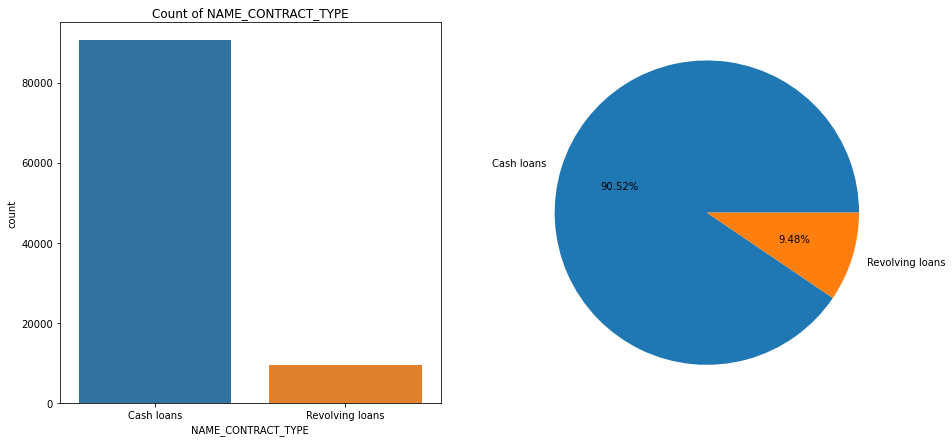

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of NAME_CONTRACT_TYPE")               
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### about 90 percent have taken cash loans

## GENDER

In [14]:
info_of_cat('GENDER')

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


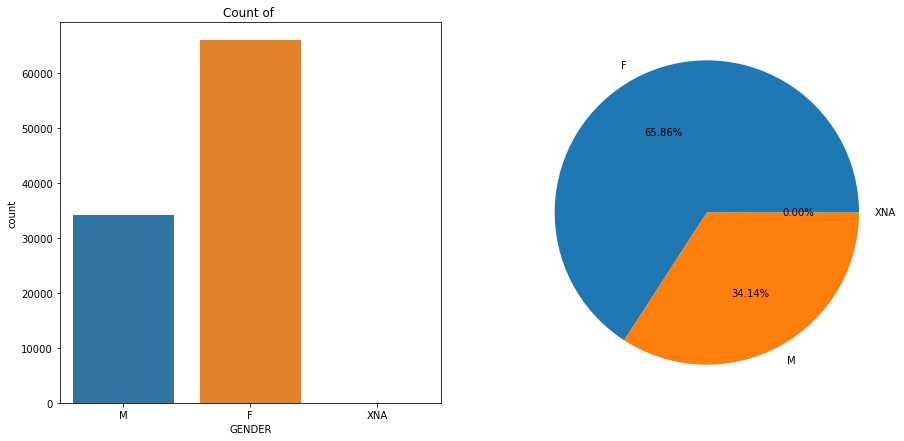

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of ")               
percentage = df["GENDER"].value_counts()         
labels = list(df["GENDER"].value_counts().index) 

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

In [16]:
## XNA IS NEGLIBLE VALUE SO WE CAN REPLACE IT WITH MODE OF GENDER

In [17]:
df.loc[df['GENDER']=='XNA', 'GENDER'] = df.GENDER.mode()[0]

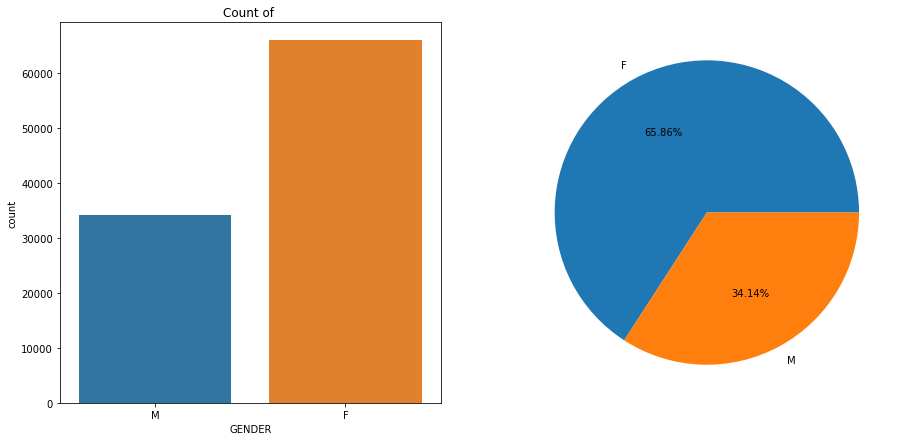

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of ")               
percentage = df["GENDER"].value_counts()         
labels = list(df["GENDER"].value_counts().index) 

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### more female(66 percent) have taken loans as compared to male

## Car

In [19]:
info_of_cat('Car')

Unique values in Car are: ['N' 'Y']
Mode of Car is N
Number of missing values in Car is 0


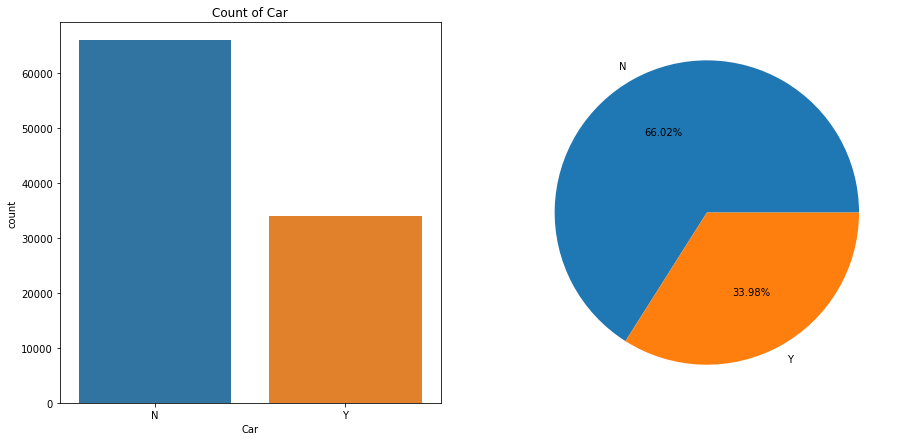

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Car")               
percentage = df["Car"].value_counts()         
labels = list(df["Car"].value_counts().index) 

sns.countplot(x = df["Car"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### about 34 percent people have cars 

## House

In [21]:
info_of_cat('House')

Unique values in House are: ['Y' 'N']
Mode of House is Y
Number of missing values in House is 0


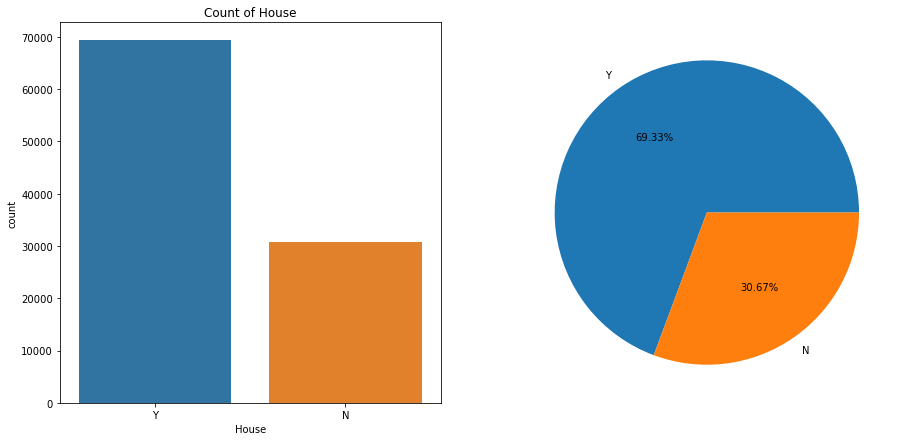

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of House")               
percentage = df["House"].value_counts()         
labels = list(df["House"].value_counts().index) 

sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### about 70 percent people have house

## NAME_INCOME_TYPE

In [23]:
info_of_cat('NAME_INCOME_TYPE')

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


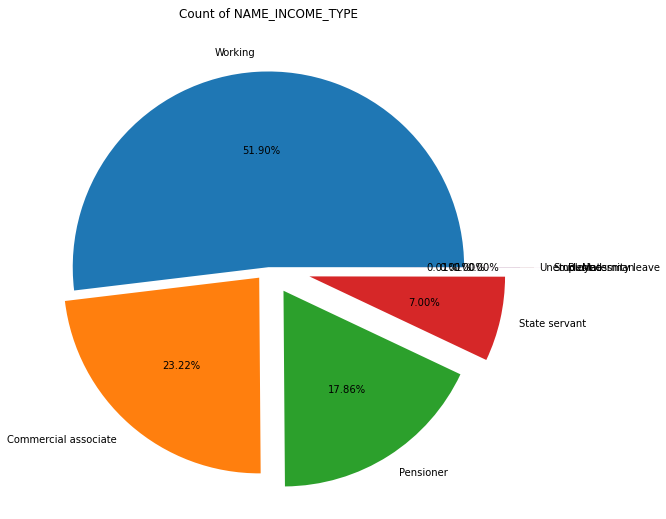

In [83]:
fig, ax = plt.subplots( figsize = (16, 9))
ax.set_title("Count of NAME_INCOME_TYPE")               
percentage = df["NAME_INCOME_TYPE"].value_counts()         
labels = list(df["NAME_INCOME_TYPE"].value_counts().index) 


plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode=np.linspace(0,0.5,num=df.NAME_INCOME_TYPE.nunique()))   

plt.show()

### working people are in majority about 52 percent and only working,commercial associate,state servant,pensioner are worth considering , rest are negligible

## NAME_FAMILY_STATUS

In [25]:
info_of_cat('NAME_FAMILY_STATUS')

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


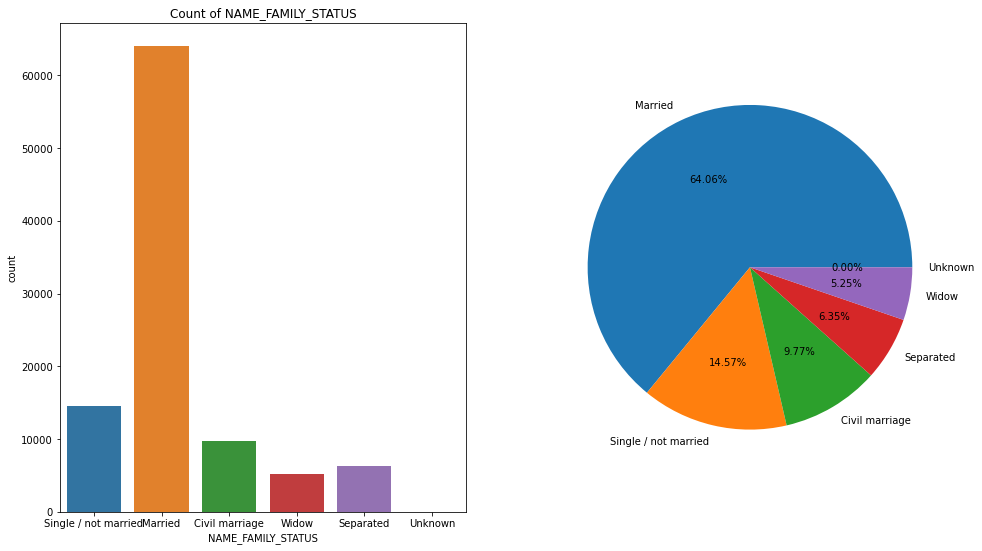

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))
ax[0].set_title("Count of NAME_FAMILY_STATUS")               
percentage = df["NAME_FAMILY_STATUS"].value_counts()         
labels = list(df["NAME_FAMILY_STATUS"].value_counts().index) 

sns.countplot(x = df["NAME_FAMILY_STATUS"], ax = ax[0],orient='h')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### majority about 64 percent people are married 

## NAME_EDUCATION_TYPE

In [27]:
info_of_cat('NAME_EDUCATION_TYPE')

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


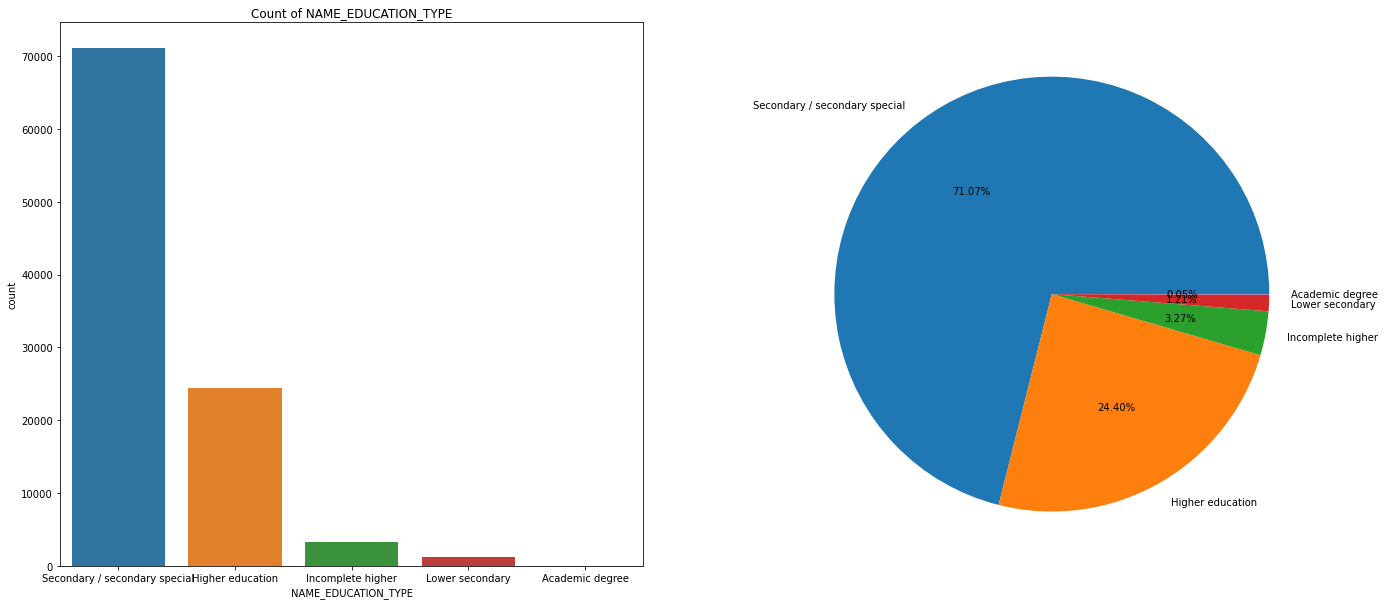

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (23,10))
ax[0].set_title("Count of NAME_EDUCATION_TYPE")               
percentage = df["NAME_EDUCATION_TYPE"].value_counts()         
labels = list(df["NAME_EDUCATION_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_EDUCATION_TYPE"], ax = ax[0],orient='h')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### most of people are educated upto secondary level followed by higher eduaction level

## CNT_CHILDREN

In [29]:
info_of_cat('CNT_CHILDREN')

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


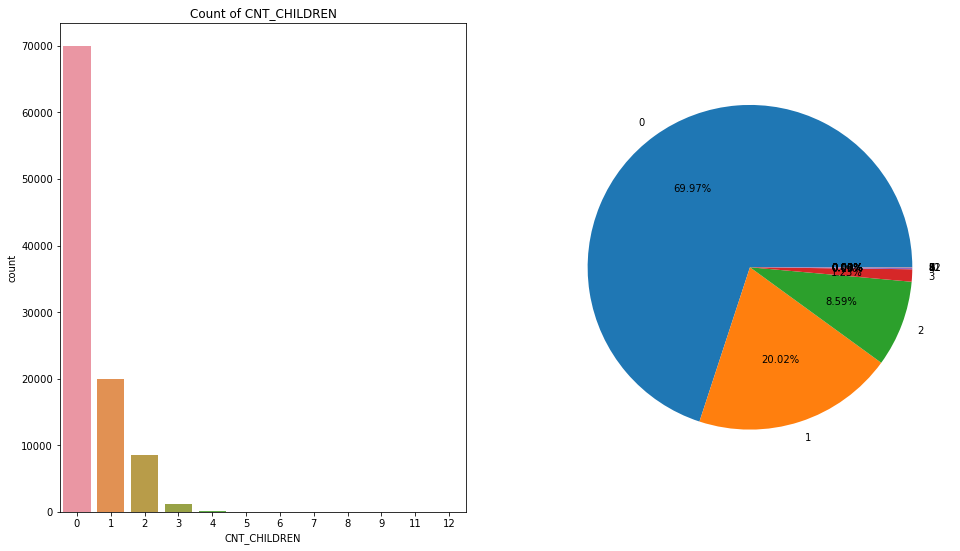

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))
ax[0].set_title("Count of CNT_CHILDREN")               
percentage = df["CNT_CHILDREN"].value_counts()         
labels = list(df["CNT_CHILDREN"].value_counts().index) 

sns.countplot(x = df["CNT_CHILDREN"], ax = ax[0],orient='h')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

## majority of people have no children about 70 percent followed by 1 child about 20 %

## MOBILE_REACHABLE

In [31]:
info_of_cat('MOBILE_REACHABLE')

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


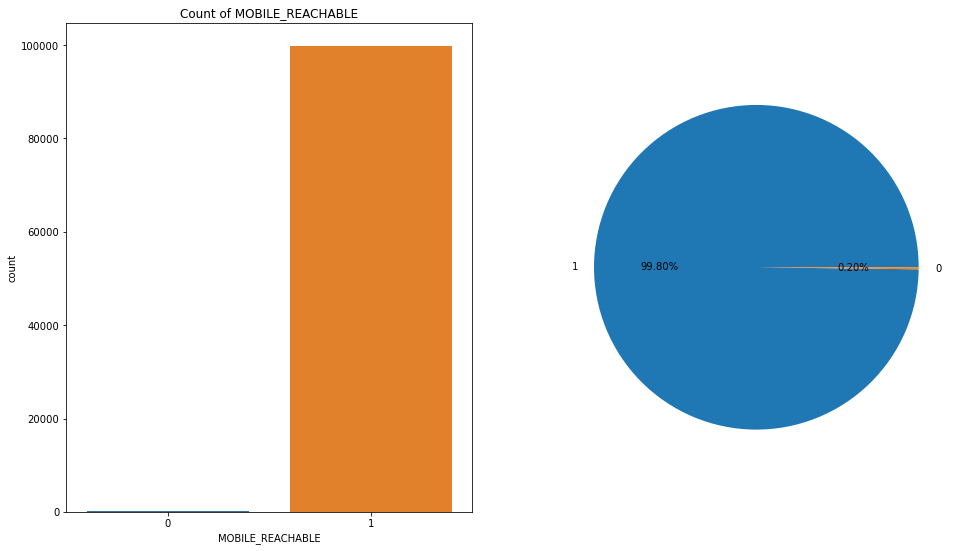

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))
ax[0].set_title("Count of MOBILE_REACHABLE")               
percentage = df["MOBILE_REACHABLE"].value_counts()         
labels = list(df["MOBILE_REACHABLE"].value_counts().index) 

sns.countplot(x = df["MOBILE_REACHABLE"], ax = ax[0],orient='h')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

### almost all people are reachable by phone

## OCCUPATION_TYPE

In [33]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224

There are null values in the OCCUPATION_TYPE column


## missing value treatment

In [ ]:
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

In [35]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 0


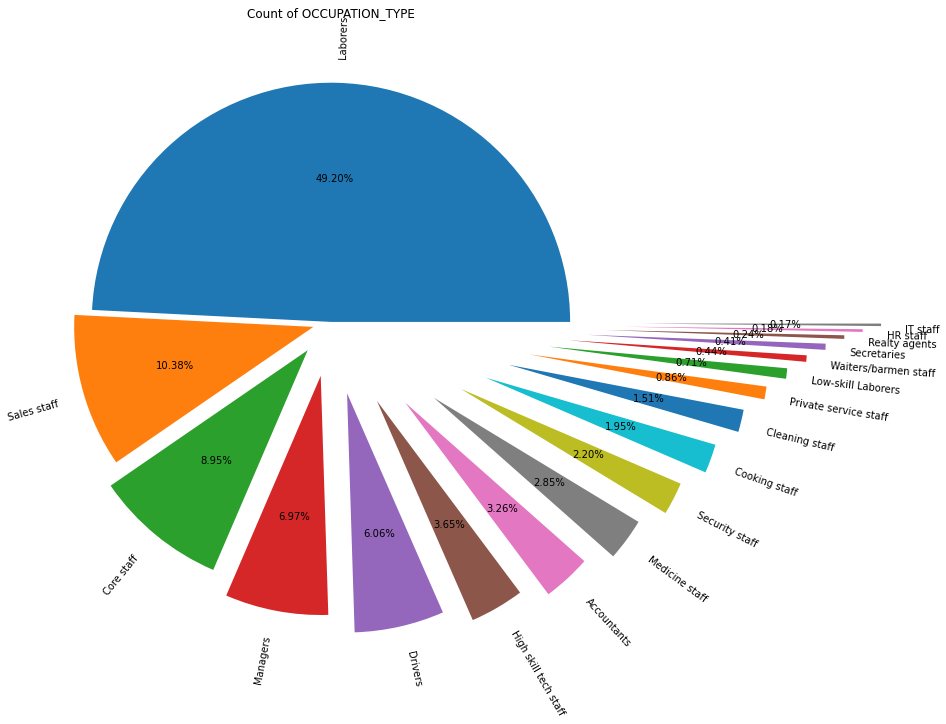

In [38]:
fig, ax = plt.subplots (figsize = (16, 11))
ax.set_title("Count of OCCUPATION_TYPE")               
percentage = df["OCCUPATION_TYPE"].value_counts()         
labels = list(df["OCCUPATION_TYPE"].value_counts().index) 


plt.pie(percentage,labels = labels, autopct= "%1.2f%%",rotatelabels=True,explode=np.linspace(0,1.3,num=df['OCCUPATION_TYPE'].nunique()))   

plt.show()


### majority about 50 % people are labourers 

# univariate analysis of continuous variable

In [39]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [40]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

## AMT_INCOME_TOTAL

In [41]:
info_of_numerical('AMT_INCOME_TOTAL')

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in the AMT_INCOME_TOTAL is 0


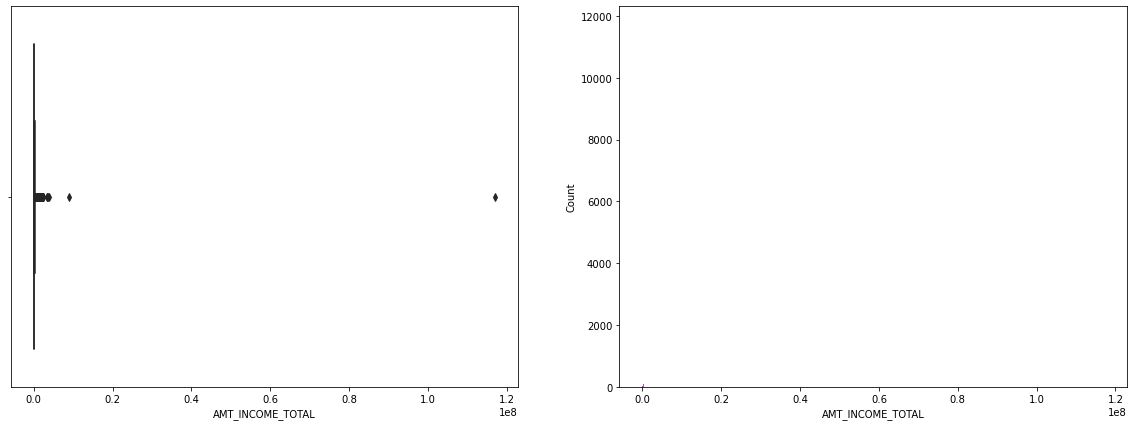

In [42]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## outlier treatment

In [43]:
b=df.describe()['AMT_INCOME_TOTAL']
b

count    1.000000e+05
mean     1.694261e+05
std      3.835007e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
iqr=(b.loc['75%']-b.loc['25%'])
iqr

90000.0

In [45]:
upper1=b.loc['75%']+1.5*iqr
upper1

337500.0

In [46]:
lower1=b.loc['25%']-1.5*iqr
lower1

-22500.0

In [47]:
df3=df.copy()

In [48]:
df3['AMT_INCOME_TOTAL']=np.clip(df3['AMT_INCOME_TOTAL'],upper1,lower1)

In [49]:
f=df3.describe()['AMT_INCOME_TOTAL']
f

count    100000.000000
mean     162551.200556
std       73404.981209
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

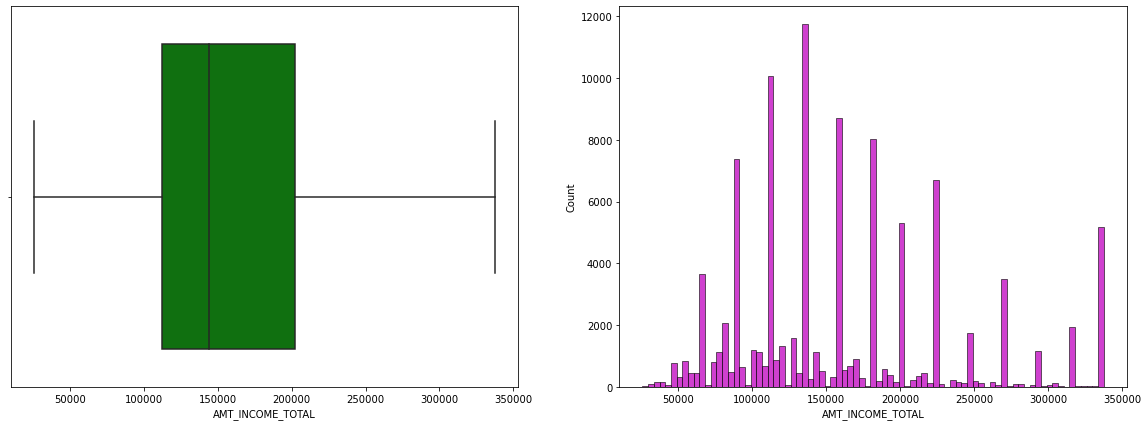

In [50]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df3["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df3["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### mean income is 162k and majority lies between 112k and 202k

## AMT_CREDIT

In [51]:
info_of_numerical('AMT_CREDIT')

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in the AMT_CREDIT is 0


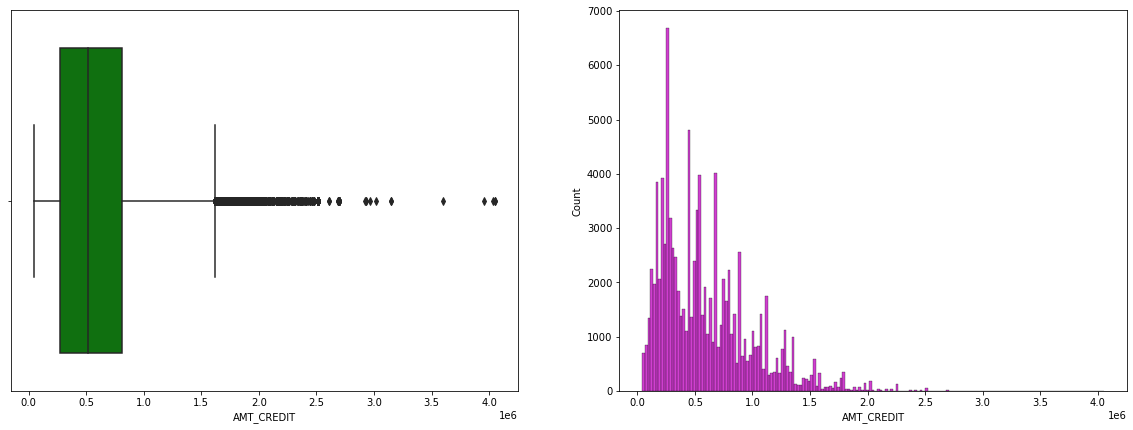

In [52]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df3["AMT_CREDIT"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df3["AMT_CREDIT"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### outlier treatment

In [54]:
c=df3.describe()['AMT_CREDIT']
c

count    1.000000e+05
mean     5.990034e+05
std      4.020520e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.130405e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [55]:
iqr1=(c.loc['75%']-c.loc['25%'])
iqr1

538650.0

In [56]:
upper2=c.loc['75%']+1.5*iqr
upper2

943650.0

In [57]:
lower2=c.loc['25%']-1.5*iqr
lower2

135000.0

In [59]:
df3[df3['AMT_CREDIT']>upper2].shape

(17765, 24)

In [60]:
df3.loc[df3['AMT_CREDIT']>upper2,'AMT_CREDIT']=df3['AMT_CREDIT'].mean()

In [61]:
df3[df3['AMT_CREDIT']>upper2]['AMT_CREDIT']

Series([], Name: AMT_CREDIT, dtype: float64)

In [163]:
df=df3.describe()['AMT_CREDIT']
df

count    100000.000000
mean     477464.546561
std      218836.222719
min       45000.000000
25%      270000.000000
50%      513040.500000
75%      599003.446500
max      943515.000000
Name: AMT_CREDIT, dtype: float64

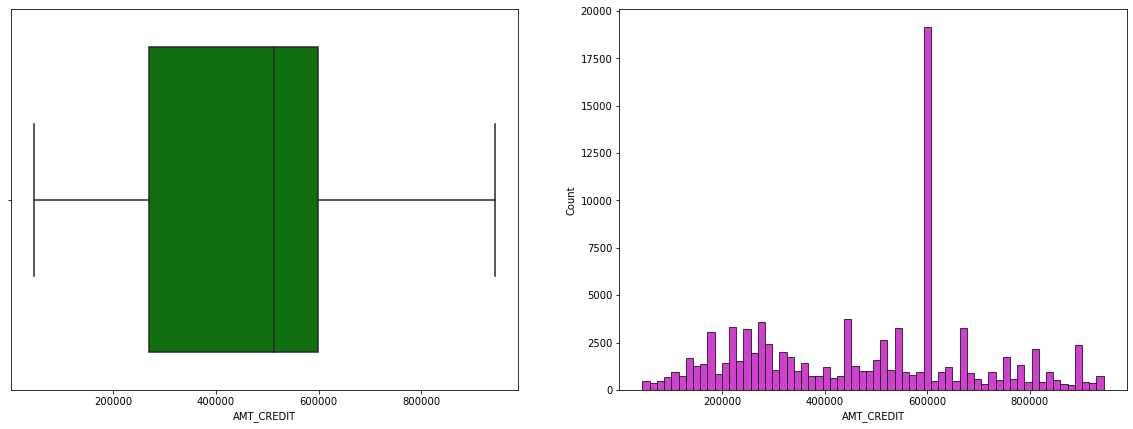

In [62]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df3["AMT_CREDIT"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df3["AMT_CREDIT"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### mean amount credited is 477k with majority between 270k and 600k

## AMT_GOODS_PRICE

In [63]:
info_of_numerical('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in the AMT_GOODS_PRICE is 81


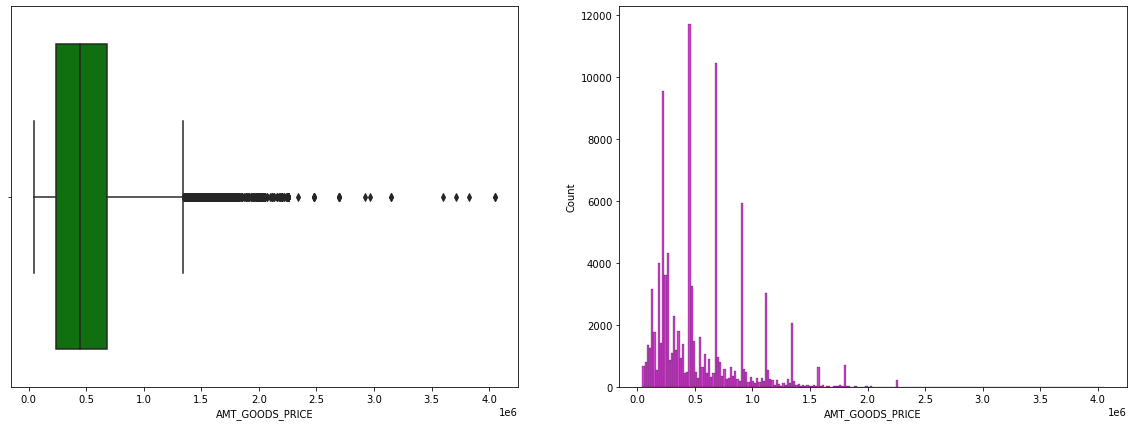

In [64]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### outlier treatment

In [65]:
d=df3.describe()['AMT_GOODS_PRICE']
d

count    9.991900e+04
mean     5.383451e+05
std      3.693977e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [66]:
iqr2=(d.loc['75%']-d.loc['25%'])
iqr2

441000.0

In [67]:
upper3=d.loc['75%']+1.5*iqr2
upper3

1341000.0

In [68]:
lower3=d.loc['25%']-1.5*iqr2
lower3

-423000.0

In [69]:
df3[df3['AMT_GOODS_PRICE']>upper3].shape

(4836, 24)

In [70]:
df3['AMT_GOODS_PRICE']=np.clip(df3['AMT_INCOME_TOTAL'],upper3,lower3)

In [164]:
dg=df3.describe()['AMT_GOODS_PRICE']
dg

count    100000.000000
mean     162551.200556
std       73404.981209
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      337500.000000
Name: AMT_GOODS_PRICE, dtype: float64

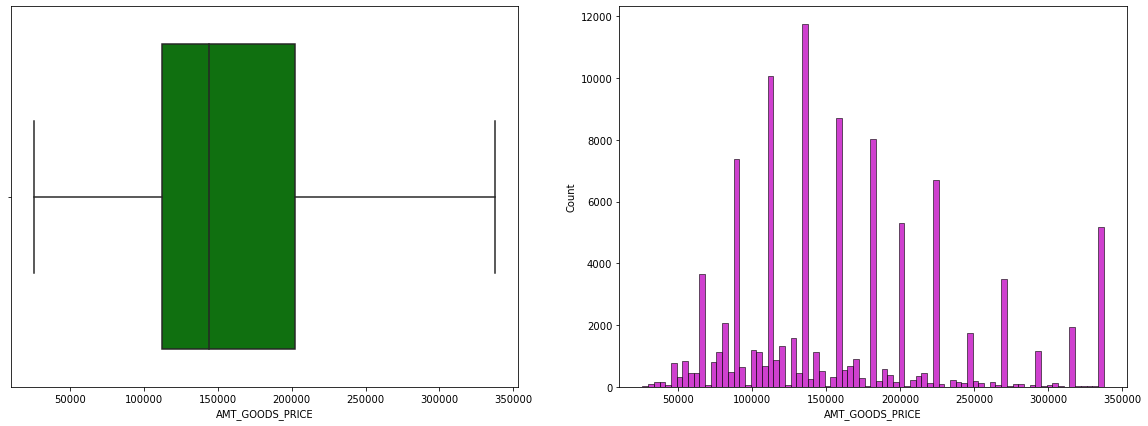

In [71]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df3["AMT_GOODS_PRICE"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df3["AMT_GOODS_PRICE"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### mean goods price is about 162k

# level 2 analysis

## we need to find people who are less likely to default

### "Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"

## 1. IMPACT OF NAME_CONTRACT_TYPE ON REPAYING ABILITY

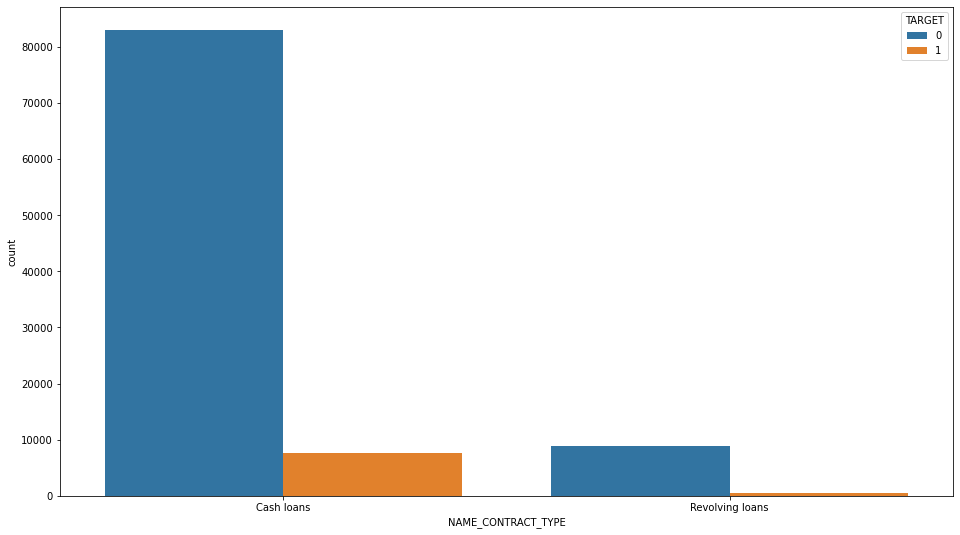

In [96]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = df3)

plt.show()

### majority of PEOPLE are HAVING CASH TYPE LOANS  AS WELL aS are MORE LIKELY TO FACE DIFFICULTIES IN REPAYING LOANS

## 2. impact of education on repaying ability

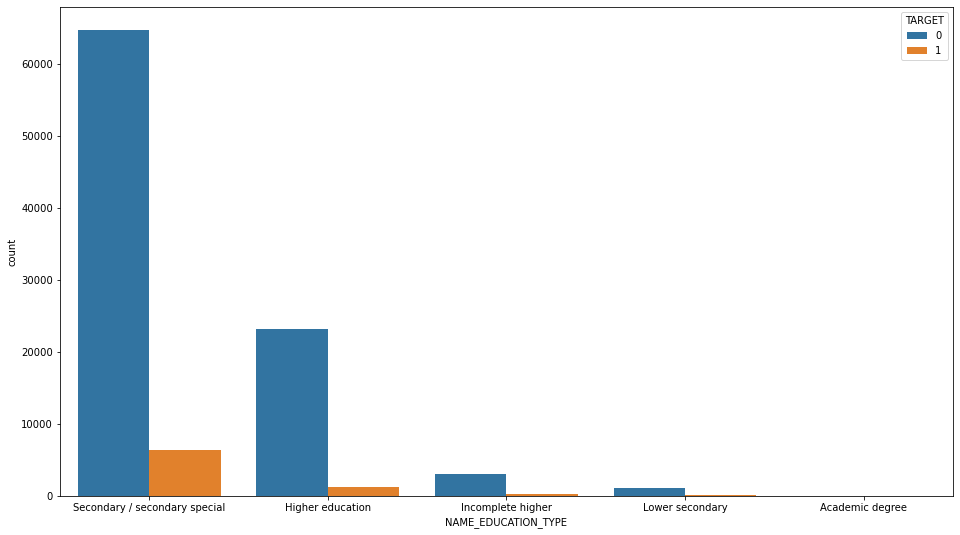

In [97]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "TARGET", data = df3)

plt.show()

### PEOPLE HAVING SECONDARY EDUACTION ONLY HAVE THE HIGHEST CHANCE OF NOT REPAYING LOANS FOLLOWED BY PEOPLE HAVING HIGHER EDUCATION

## 3. impact of having house on repaying ability

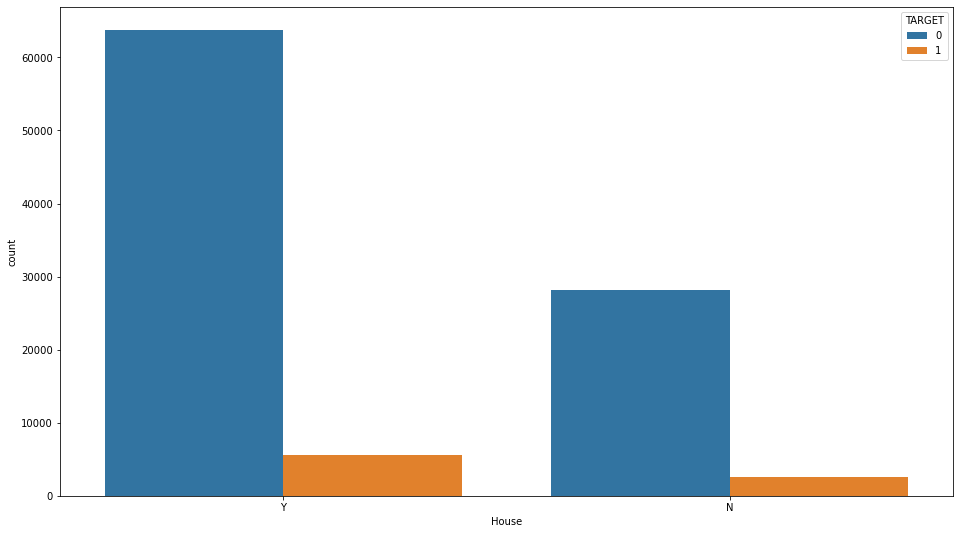

In [98]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "House", hue = "TARGET", data = df3)

plt.show()

### no direct relationship between having house and target

## impact of occupation type on target

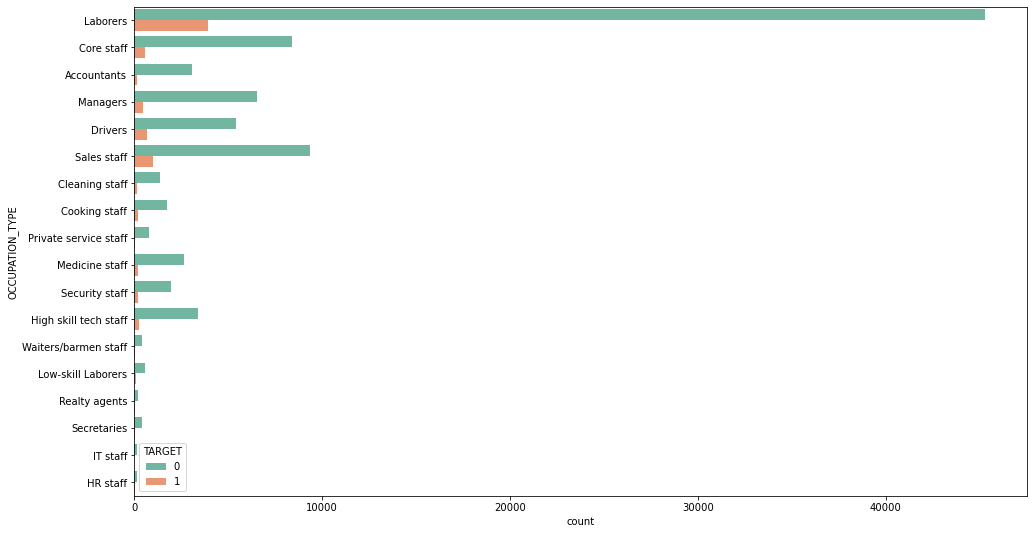

In [140]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(y = "OCCUPATION_TYPE", hue = "TARGET", data = df3,palette='Set2')

plt.show()

### max no labourers are not able to repay loans followed by sales staff

## LEVEL 3 ANALYSIS

### 4. impact on income on target

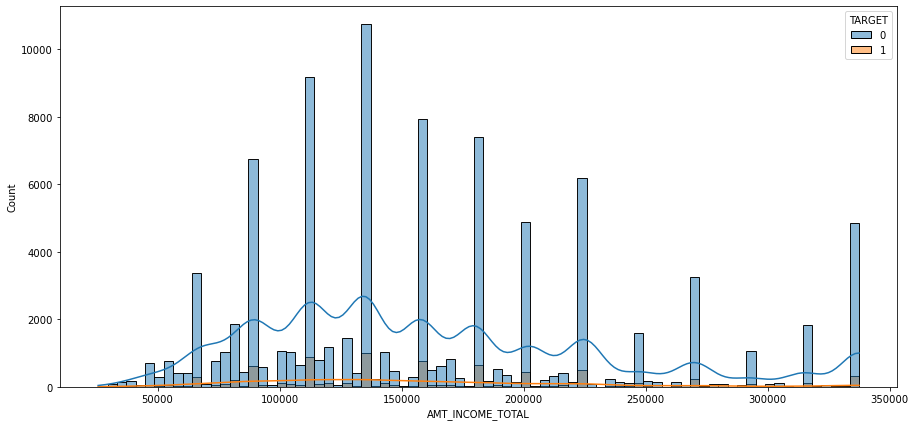

In [120]:
fig, ax = plt.subplots( figsize = (15, 7))
sns.histplot(x = df3["AMT_INCOME_TOTAL"], hue = df3["TARGET"],kde=True)
plt.show()

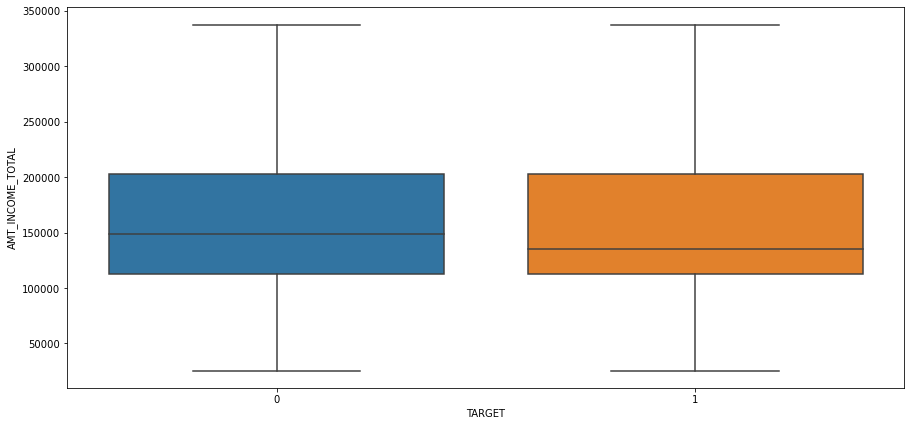

In [119]:
fig, ax = plt.subplots( figsize = (15, 7))
sns.boxplot(y = df3["AMT_INCOME_TOTAL"], x = df3["TARGET"]);

### most of the customers have income between 100000 and 200000 who are not facing difficulty in repaying loan and those are not able to repay loan have generally lower income

## 5. impact of amount credit on target

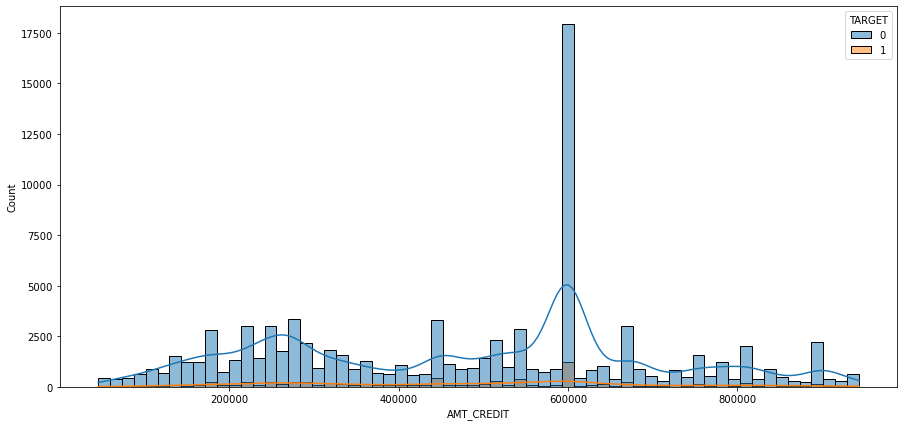

In [155]:

fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(x = df3["AMT_CREDIT"], hue = df3["TARGET"],kde=True);


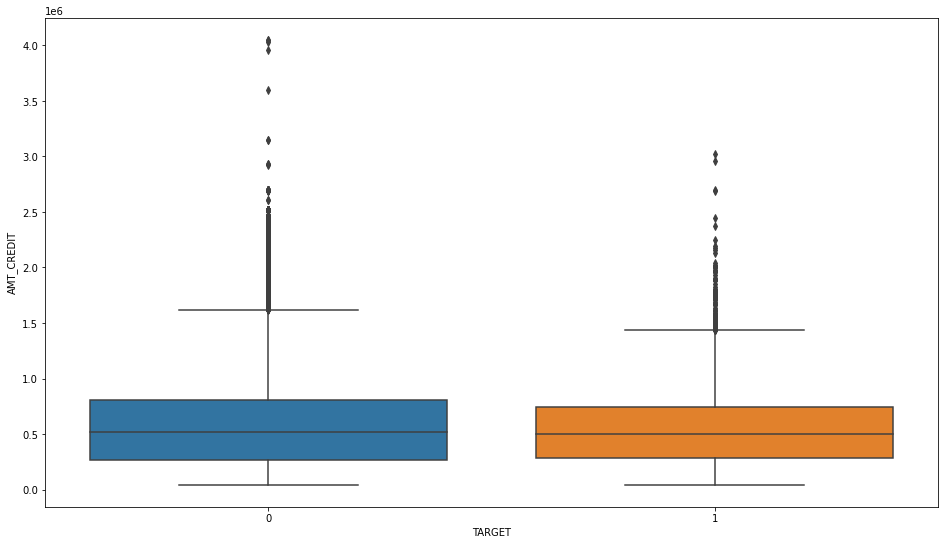

In [129]:
fig, ax = plt.subplots( figsize = (16, 9))
sns.boxplot(y = df["AMT_CREDIT"], x = df["TARGET"])
plt.show()

### there is no direct impact OF AMOUNT CREDIT on target

## 6. impact of AMT_GOODS_PRICE on target

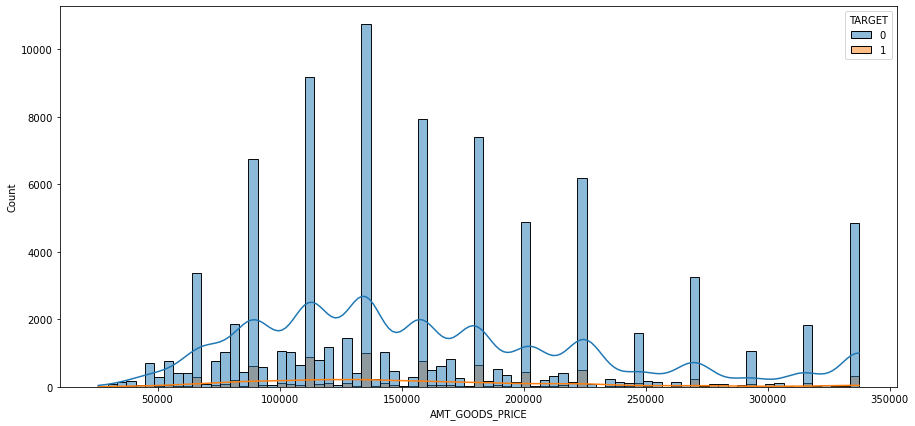

In [154]:

fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(x = df3["AMT_GOODS_PRICE"], hue = df3["TARGET"],kde=True);


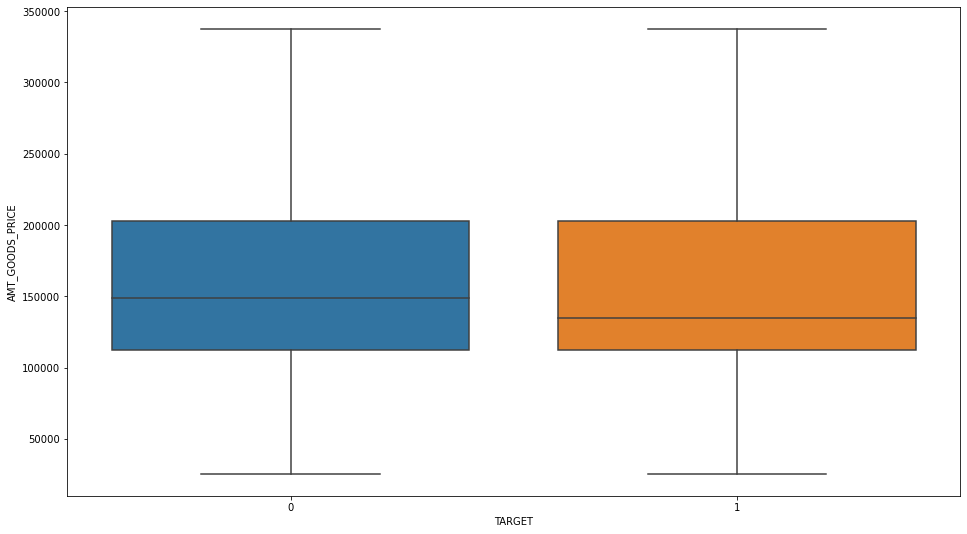

In [153]:
fig, ax = plt.subplots( figsize = (16, 9))
sns.boxplot(y = df3["AMT_GOODS_PRICE"], x = df3["TARGET"])
plt.show()

### there is no clear relation between amount goods price on target

## 7. impact of  having income less than mean on the ability to repay loan with or without house

In [145]:
a2=df3[df3['AMT_INCOME_TOTAL']<df3.AMT_INCOME_TOTAL.mean()]
a2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0000,67500.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5000,135000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0000,121500.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5000,99000.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,599003.4465,112500.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0000,81000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0000,90000.0,...,-491,1,1,1,1,0,Core staff,1.0,TUESDAY,0
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0000,157500.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,599003.4465,135000.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1


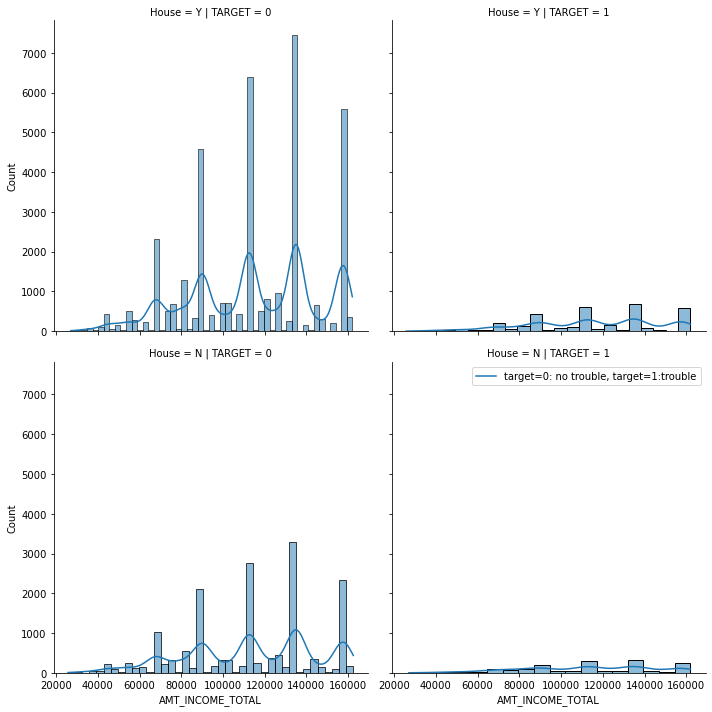

In [146]:

g = sns.FacetGrid(a2, row='House',col = "TARGET",aspect=1,height=5)
g.map(sns.histplot, "AMT_INCOME_TOTAL",kde=True)
plt.legend(['target=0: no trouble, target=1:trouble'])
plt.show()

## people having income less than mean struggle to repay loans whether or not they own a house

## 8. impact of  having income less than mean on the ability to repay loan wrt gender

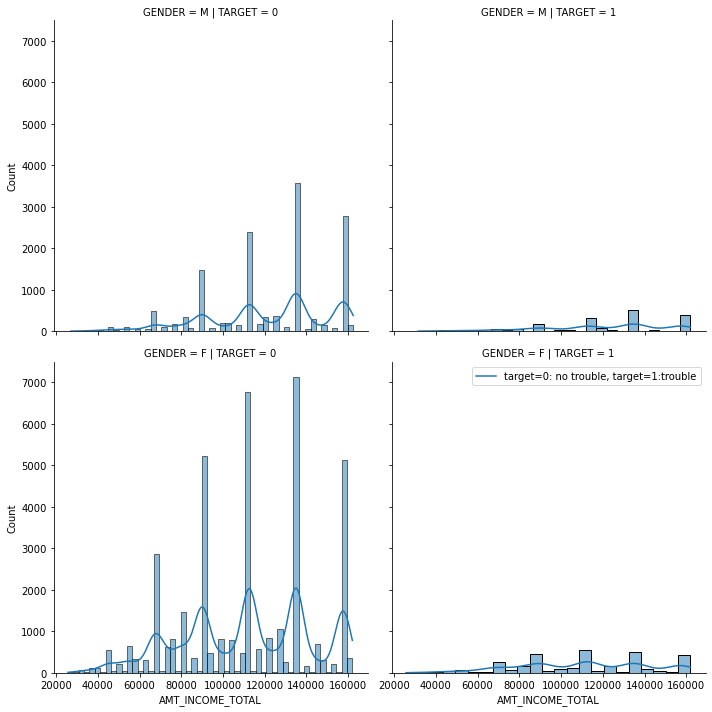

In [158]:
g = sns.FacetGrid(a2, col='TARGET',row = "GENDER",aspect=1,height=5)
g.map(sns.histplot, "AMT_INCOME_TOTAL",kde=True)
plt.legend(['target=0: no trouble, target=1:trouble'])
plt.show()

### female have generally more ABILITY TO REPAY LOANS  THAN Male having income less than mean

## impact of children on target on people having income more than mean

In [151]:
a3=df3[df3['AMT_INCOME_TOTAL']>df3.AMT_INCOME_TOTAL.mean()]
a3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5000,202500.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,599003.4465,270000.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,599003.4465,171000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,337500.0,599003.4465,337500.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0000,225000.0,...,-3028,1,1,0,1,0,Drivers,3.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,216080,0,Cash loans,F,N,Y,0,180000.0,599003.4465,180000.0,...,-2250,1,1,0,1,0,Laborers,2.0,MONDAY,1
99991,216082,0,Cash loans,M,Y,N,2,270000.0,450000.0000,270000.0,...,-5525,1,1,0,1,0,Managers,4.0,MONDAY,1
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0000,225000.0,...,-135,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0000,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1


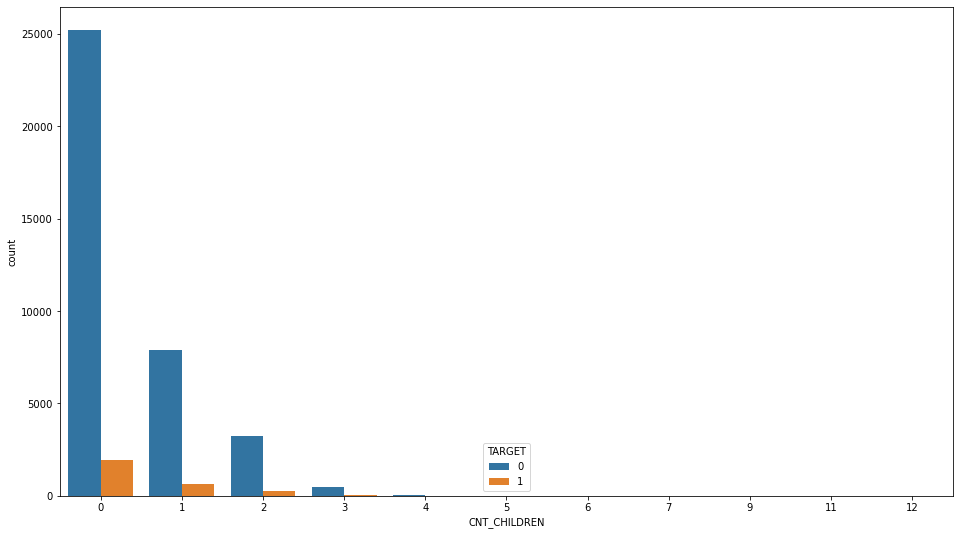

In [169]:
fig, ax = plt.subplots( figsize = (16, 9))
sns.countplot(data=a3,x='CNT_CHILDREN',hue='TARGET');

### max no of people with 0 and 1 child have difficulty repaying loan

# insights

1. about 8 percent of people have problem repaying their loans 
2. about 90 percent have taken cash loans
3. more female(66 percent) have taken loans as compared to male
4. about 34 percent people have cars 
5. about 70 percent people have house
6. working people are in majority about 52 % and only working,commercial associate,state servant,pensioner are worth considering     rest are    negligible
7. majority about 64 percent people are married 
8. most of people are educated upto secondary level followed by higher eduaction level
9. majority of people have no children about 70 percent followed by 1 child about 20 %
10. majority about 50 % people are labourers 
11. mean income is 162k and majority lies between 112k and 202k
11. mean amount credited is 477k with majority between 270k and 600k
12. mean goods price is about 162k
13.  there is no direct impact OF AMOUNT CREDIT on target

## RECOMMENDATIONS

14. majority of PEOPLE are HAVING CASH TYPE LOANS  AS WELL aS are MORE LIKELY TO FACE DIFFICULTIES IN REPAYING LOANS
15. PEOPLE HAVING SECONDARY EDUACTION ONLY HAVE THE HIGHEST CHANCE OF NOT REPAYING LOANS FOLLOWED BY PEOPLE HAVING HIGHER   EDUCATION
16. more defaulters are taking cash loans
17. MAX no  OF labourers are not able to repay loans followed by sales staff
18.  most of the customers have income between 100000 and 200000 who are not facing difficulty in repaying loan and those are  not able to repay loan have generally lower income
20. there is no clear relation between amount goods price on target
21. people having income less than mean struggle to repay loans whether or not they own a house
22. female have generally more ABILITY TO REPAY LOANS  THAN Male having income less than mean
23. maximum numbers of defaulters are found at 250k  to 300k credit amount
24. max no of people with 0 and 1 child have difficulty repaying loan
